# Functions to create InferenceData Objects


In [2]:
import arviz as az
import numpy as np
import pymc as pm

def logit_to_probability(logit_vals):
    """Apply logistic transformation to logit values."""
    return 1 / (1 + np.exp(-logit_vals))

def log_to_exp(log_values):
    return np.exp(log_values)

def create_inference_data_from_trace(trace,  variable_list, transformations=None):
    """
    Create a summary from a PyMC trace.
    
    Parameters:
    - trace: PyMC trace object.
    - variable_list: List of variable names to include in the summary.
    - transformations: Optional dictionary mapping variable names to functions that will be applied to transform these variables.
    - hdi: 
    
   
    """
    posterior_dict = {}
    if transformations is None:
        transformations = {}
    
    # Extract variables and apply transformations if specified
    for variable in variable_list:
        data = trace.posterior[variable].values
        if variable in transformations:
            # Apply the transformation function if specified
            data = transformations[variable](data)
        posterior_dict[variable] = data

    # Create an InferenceData object
    return az.from_dict(posterior=posterior_dict)


# Model 2 Plots

In [3]:
# Example usage
trace = az.from_netcdf("single_parameter_models/model_2_trace.nc")
variable_list = ['a_m', 'a_bar', 'sigma_a', 'theta', 'sigma_b', 'b_p',]
transformations = {
    'a_m': logit_to_probability,
    'a_bar': logit_to_probability,
    'sigma_a': logit_to_probability
}

idata = create_inference_data_from_trace(trace, variable_list, transformations)
az.summary(idata, variable_list, hdi_prob=0.89)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'single_parameter_models/model_2_trace.nc', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

array([[<Axes: title={'center': 'a_m'}>, <Axes: title={'center': 'a_m'}>],
       [<Axes: title={'center': 'a_bar'}>,
        <Axes: title={'center': 'a_bar'}>],
       [<Axes: title={'center': 'sigma_a'}>,
        <Axes: title={'center': 'sigma_a'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>],
       [<Axes: title={'center': 'sigma_b'}>,
        <Axes: title={'center': 'sigma_b'}>],
       [<Axes: title={'center': 'b_p'}>, <Axes: title={'center': 'b_p'}>]],
      dtype=object)

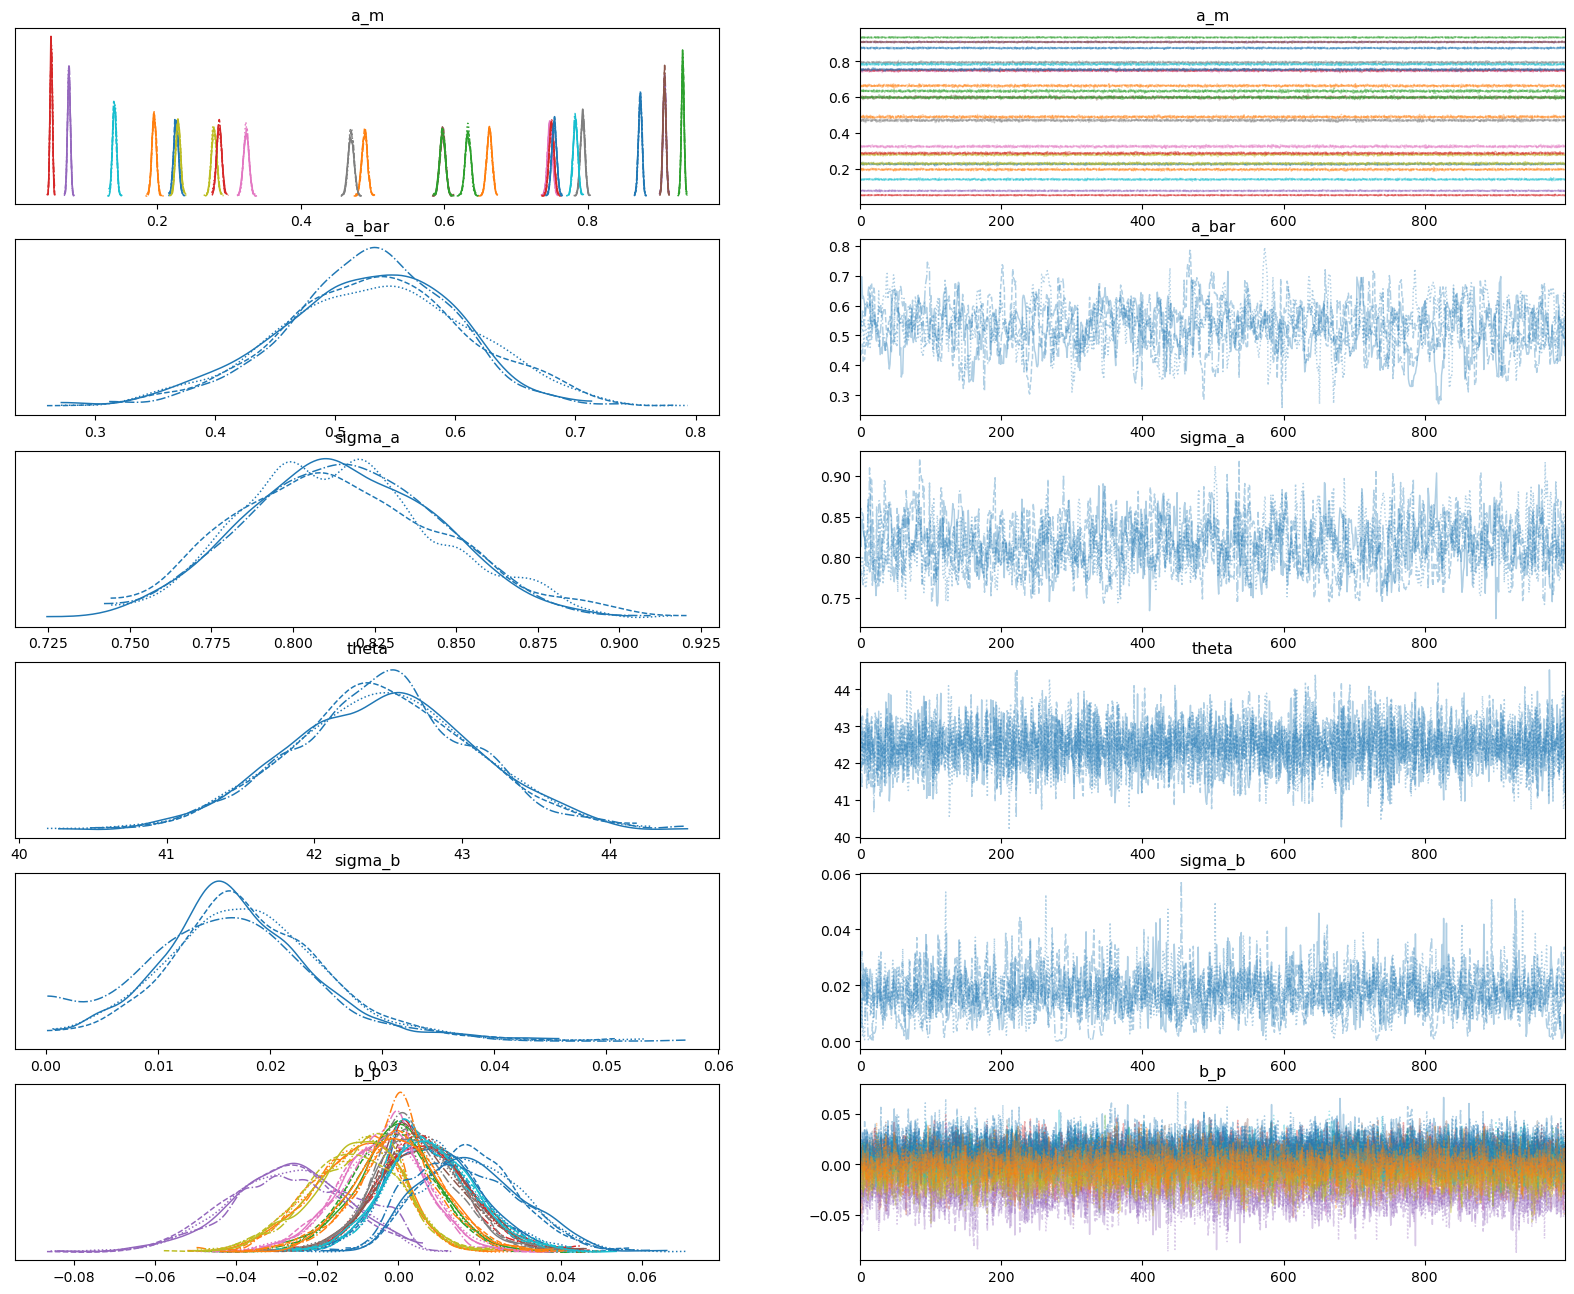

In [9]:
az.plot_trace(idata, var_names=['a_m', 'a_bar', 'sigma_a', 'theta', 'sigma_b', 'b_p'], figsize=(20, 16))

# Model 3

In [16]:
# Example usage
trace = az.from_netcdf("final_coverage_models/model_3_trace_1000.nc")
variable_list = ['a_m', 'a_bar', 'sigma_a', 'theta', 'sigma_b', 'b_p', 'sigma_g', 'g_mp']
transformations = {
    #'a_m': logit_to_probability,
    #'a_bar': logit_to_probability,
    #'sigma_a': logit_to_probability
    'b_p': logit_to_probability
}

idata = create_inference_data_from_trace(trace, variable_list, transformations)
table = az.summary(idata, ['a_m', 'a_bar', 'sigma_a', 'theta', 'sigma_b', 'b_p', 'sigma_g', 'g_mp'], hdi_prob=0.89)[30:]

# Print the names


In [4]:

import formulaic
import pymc as pm
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az

data = pd.read_csv("../single_parameter/combined_data/statistics.csv")

# We will redefine the function to exclude the "T." from the module and parameter names

def format_column_name_with_index(column_name, index):
    parts = column_name.split(']:C(TuningParameters)')
    module_name = parts[0].split('[')[-1].split(']')[0].replace('T.', '')
    parameter_name = parts[1].split('[')[-1].split(']')[0].replace('T.', '')
    return f'{index}: {module_name} x {parameter_name}'

# Dummy variables for interaction terms
model_formula = 'Coverage ~ 0 + C(TargetModule) : C(TuningParameters)'
design_matrix = formulaic.model_matrix(model_formula, data=data)

# Filter out columns that contain 'T.NONE' in their name
columns_to_drop = [col for col in design_matrix.rhs.columns if 'T.NONE' in col]

# Drop the identified columns
design_matrix.rhs.drop(columns=columns_to_drop, axis=1, inplace=True)
interaction_matrix = design_matrix.rhs.iloc[:,:]

formatted_columns_with_indices = [
    format_column_name_with_index(header, index) for index, header in enumerate(interaction_matrix.columns)
]


formatted_columns_with_indices


['0: codetiming._timer x ChangeParameterProbability',
 '1: flutils.decorators x ChangeParameterProbability',
 '2: flutils.namedtupleutils x ChangeParameterProbability',
 '3: flutils.packages x ChangeParameterProbability',
 '4: flutils.setuputils.cmd x ChangeParameterProbability',
 '5: httpie.output.formatters.headers x ChangeParameterProbability',
 '6: httpie.plugins.base x ChangeParameterProbability',
 '7: mimesis.builtins.da x ChangeParameterProbability',
 '8: py_backwards.transformers.base x ChangeParameterProbability',
 '9: py_backwards.transformers.dict_unpacking x ChangeParameterProbability',
 '10: py_backwards.transformers.return_from_generator x ChangeParameterProbability',
 '11: py_backwards.transformers.yield_from x ChangeParameterProbability',
 '12: py_backwards.utils.helpers x ChangeParameterProbability',
 '13: pymonet.immutable_list x ChangeParameterProbability',
 '14: pymonet.maybe x ChangeParameterProbability',
 '15: pymonet.validation x ChangeParameterProbability',
 '16

array([[<Axes: title={'center': 'a_m'}>, <Axes: title={'center': 'a_m'}>],
       [<Axes: title={'center': 'a_bar'}>,
        <Axes: title={'center': 'a_bar'}>],
       [<Axes: title={'center': 'sigma_a'}>,
        <Axes: title={'center': 'sigma_a'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>],
       [<Axes: title={'center': 'sigma_b'}>,
        <Axes: title={'center': 'sigma_b'}>],
       [<Axes: title={'center': 'b_p'}>, <Axes: title={'center': 'b_p'}>],
       [<Axes: title={'center': 'sigma_g'}>,
        <Axes: title={'center': 'sigma_g'}>],
       [<Axes: title={'center': 'g_mp'}>,
        <Axes: title={'center': 'g_mp'}>]], dtype=object)

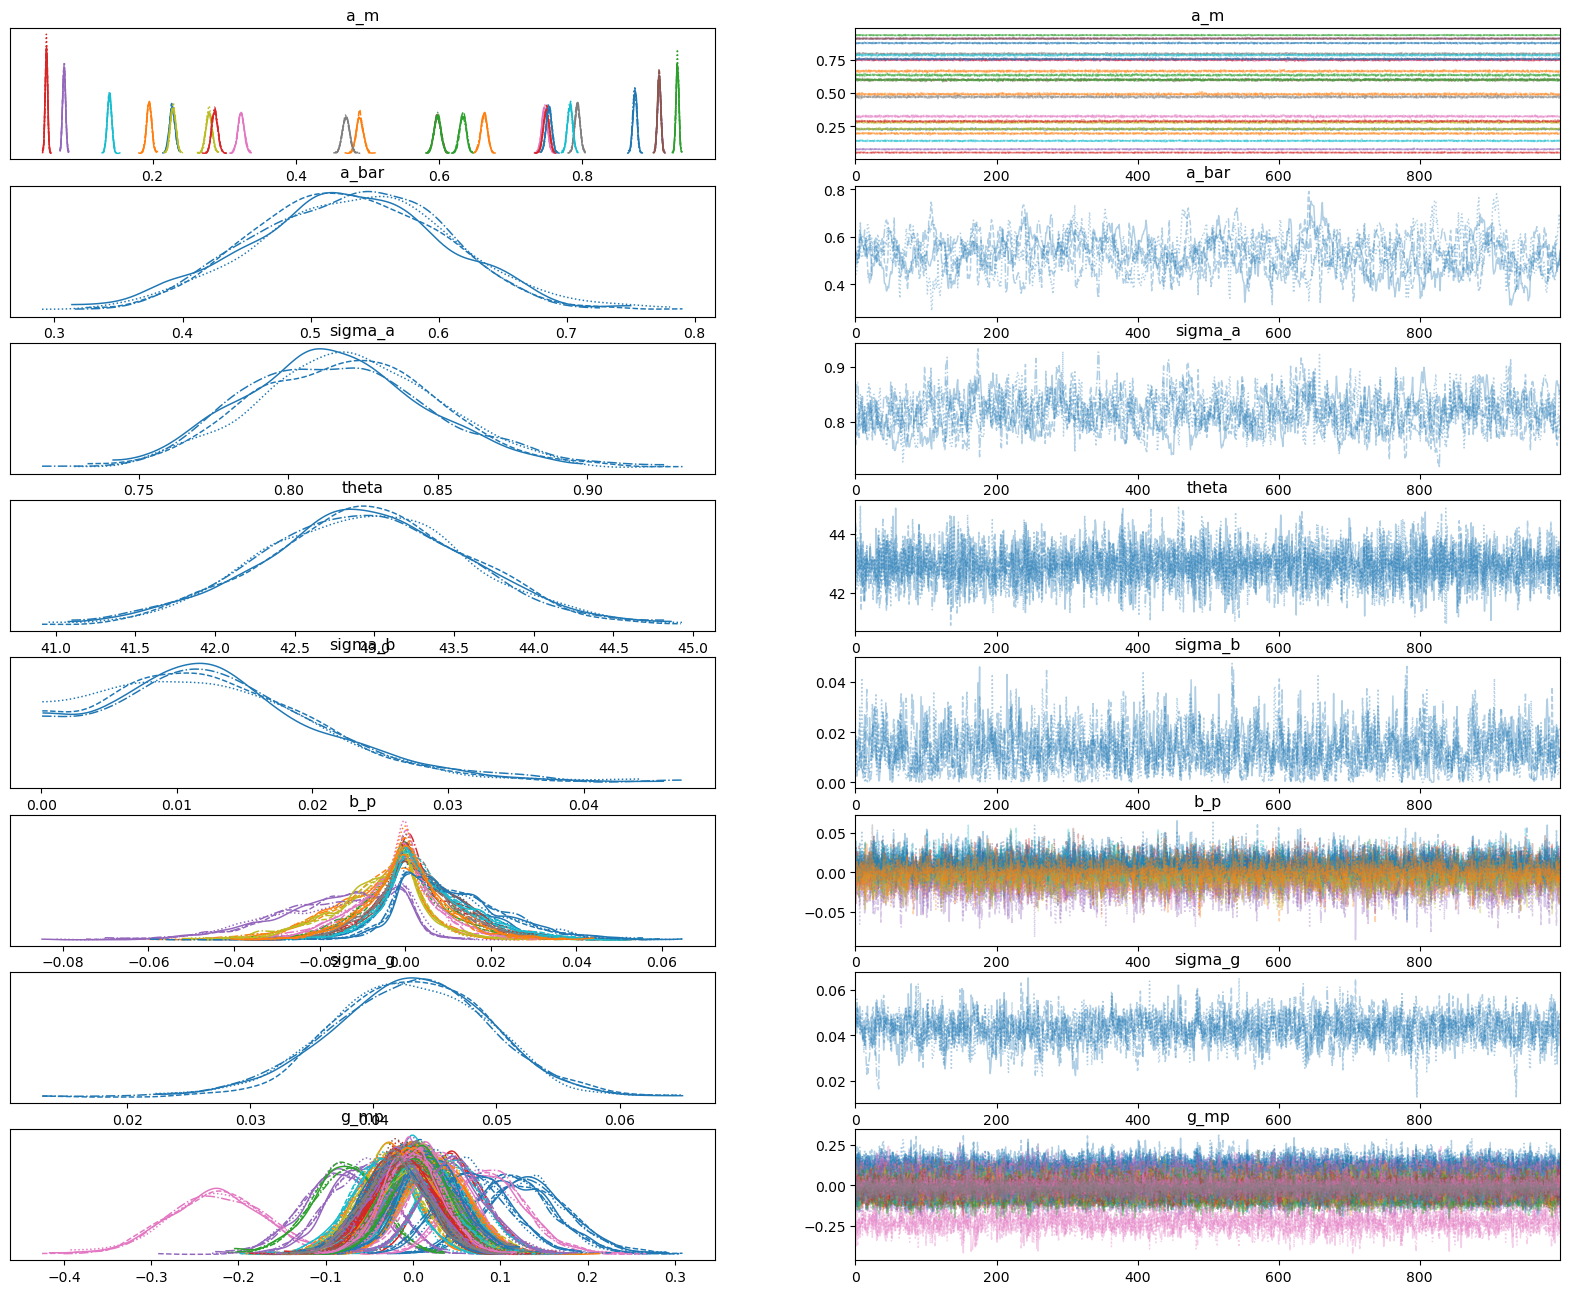

In [5]:
#plt.style.use('fivethirtyeight')  # Using a predefined style
az.plot_trace(idata, var_names=['a_m', 'a_bar', 'sigma_a', 'theta', 'sigma_b', 'b_p', 'sigma_g', 'g_mp'], figsize=(20, 16))
#plt.show()

# Overhead Model

array([[<Axes: title={'center': 'a_m'}>, <Axes: title={'center': 'a_m'}>],
       [<Axes: title={'center': 'a_bar'}>,
        <Axes: title={'center': 'a_bar'}>],
       [<Axes: title={'center': 'sigma_a'}>,
        <Axes: title={'center': 'sigma_a'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>],
       [<Axes: title={'center': 'sigma_b'}>,
        <Axes: title={'center': 'sigma_b'}>],
       [<Axes: title={'center': 'b_p'}>, <Axes: title={'center': 'b_p'}>]],
      dtype=object)

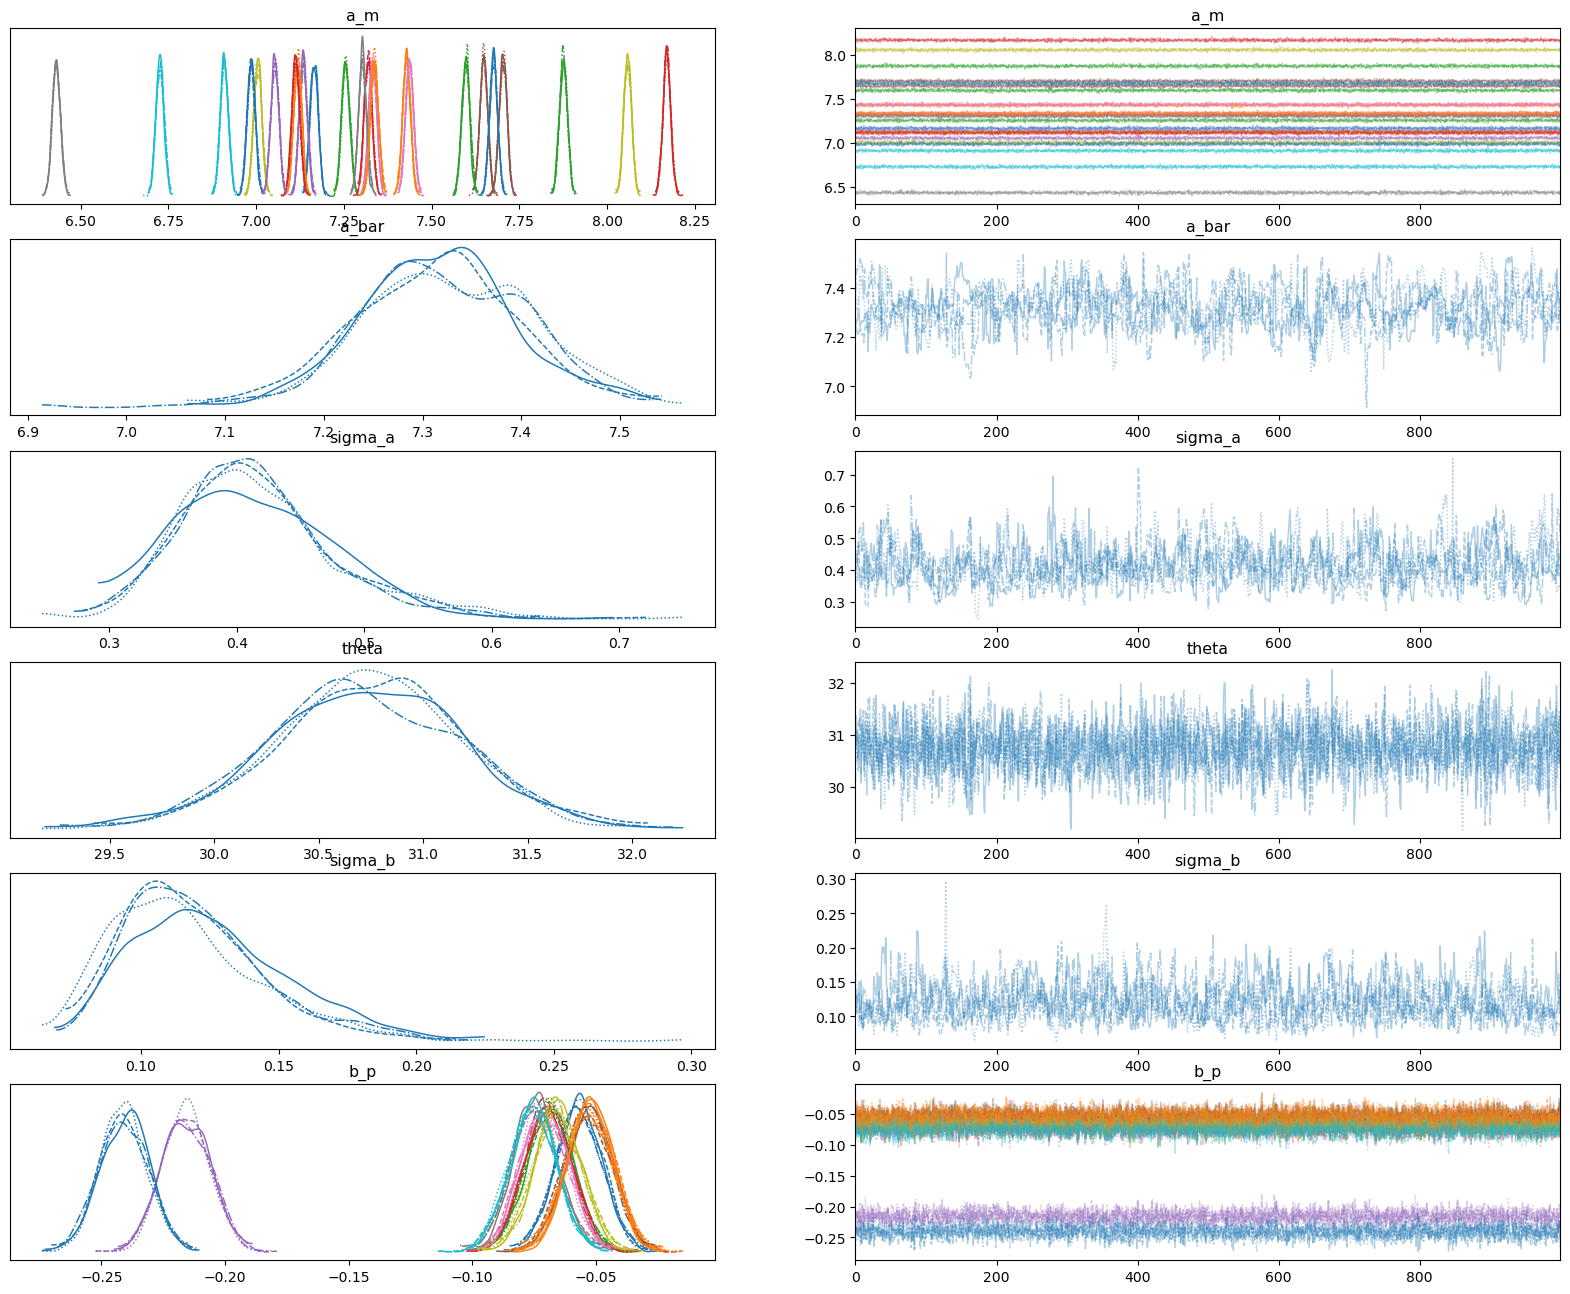

In [11]:

# Example usage
trace = az.from_netcdf("model_overhead_trace.nc")
variable_list = ['a_m', 'a_bar', 'sigma_a', 'theta', 'sigma_b', 'b_p']
transformations = {
    #'a_m': log_to_exp,
    #'a_bar': log_to_exp,
    #'sigma_a': log_to_exp
    
}

idata = create_inference_data_from_trace(trace, variable_list, transformations)
table = az.summary(idata, ['a_m', 'a_bar', 'sigma_a', 'theta', 'sigma_b', 'b_p'], hdi_prob=0.89)
az.plot_trace(idata, var_names=['a_m', 'a_bar', 'sigma_a', 'theta', 'sigma_b', 'b_p'], figsize=(20, 16))

In [6]:
az.summary(idata, var_names=variable_list, hdi_prob=0.89)

mean       sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
a_m[0]   1294.135   14.611  1270.833   1316.997      0.262    0.185    3117.0   
a_m[1]   1683.978   19.091  1653.004   1712.977      0.333    0.236    3293.0   
a_m[2]   1415.768   16.176  1390.296   1441.552      0.256    0.181    4019.0   
a_m[3]   1509.082   16.733  1482.648   1535.760      0.263    0.186    4034.0   
a_m[4]   1254.524   14.247  1231.719   1277.041      0.226    0.160    3962.0   
a_m[5]   2097.908   23.501  2061.787   2137.286      0.392    0.277    3582.0   
a_m[6]   1698.428   19.338  1667.144   1728.988      0.313    0.221    3758.0   
a_m[7]    620.855    7.184   610.316    633.113      0.118    0.083    3720.0   
a_m[8]   1101.980   12.562  1080.312   1120.513      0.209    0.148    3611.0   
a_m[9]   1002.000   11.390   983.260   1019.842      0.179    0.127    4016.0   
a_m[10]  1081.605   12.579  1062.186   1102.178      0.198    0.140    4027.0   
a_m[11]  1234.861   13.819  1213.322   1256.770      0.226    0.160    3741.0   
a_m[12]  1993.389   22.733  1956.585   2028.982      0.369    0.261    3793.0   
a_m[13]  1228.265   13.691  1207.691   1251.431      0.227    0.161    3644.0   
a_m[14]  1156.897   13.287  1135.886   1177.764      0.220    0.156    3618.0   
a_m[15]  2216.566   24.831  2176.267   2253.741      0.422    0.299    3464.0   
a_m[16]  1528.962   17.086  1501.596   1556.217      0.298    0.211    3296.0   
a_m[17]  1485.214   16.927  1458.353   1511.937      0.282    0.200    3638.0   
a_m[18]  3160.648   35.243  3108.677   3219.757      0.558    0.394    3991.0   
a_m[19]   834.082    9.587   818.724    849.318      0.169    0.120    3188.0   
a_m[20]  2157.078   24.110  2119.452   2196.280      0.404    0.286    3548.0   
a_m[21]  1536.481   17.611  1506.638   1563.280      0.282    0.199    3901.0   
a_m[22]  2631.929   29.969  2582.190   2677.398      0.499    0.353    3608.0   
a_m[23]  3534.593   39.264  3469.495   3596.175      0.624    0.442    3969.0   
a_bar    1514.085  126.296  1315.031   1713.665      5.960    4.217     445.0   
sigma_a     1.516    0.094     1.372      1.658      0.004    0.003     593.0   
theta      30.731    0.454    29.986     31.439      0.009    0.006    2650.0   
sigma_b     0.120    0.027     0.079      0.159      0.001    0.001     348.0   
b_p[0]     -0.057    0.009    -0.071     -0.041      0.000    0.000    3707.0   
b_p[1]     -0.052    0.009    -0.066     -0.037      0.000    0.000    2644.0   
b_p[2]     -0.068    0.010    -0.084     -0.053      0.000    0.000    3725.0   
b_p[3]     -0.069    0.009    -0.084     -0.055      0.000    0.000    3449.0   
b_p[4]     -0.216    0.010    -0.232     -0.201      0.000    0.000    3747.0   
b_p[5]     -0.053    0.010    -0.068     -0.038      0.000    0.000    3101.0   
b_p[6]     -0.071    0.010    -0.085     -0.055      0.000    0.000    3654.0   
b_p[7]     -0.074    0.009    -0.089     -0.059      0.000    0.000    3558.0   
b_p[8]     -0.066    0.010    -0.081     -0.050      0.000    0.000    3673.0   
b_p[9]     -0.075    0.010    -0.091     -0.061      0.000    0.000    3686.0   
b_p[10]    -0.241    0.010    -0.256     -0.225      0.000    0.000    3569.0   
b_p[11]    -0.053    0.010    -0.068     -0.038      0.000    0.000    3273.0   

         ess_tail  r_hat  
a_m[0]     2933.0   1.00  
a_m[1]     2954.0   1.00  
a_m[2]     3233.0   1.00  
a_m[3]     3406.0   1.00  
a_m[4]     3377.0   1.00  
a_m[5]     2782.0   1.00  
a_m[6]     3040.0   1.00  
a_m[7]     3627.0   1.00  
a_m[8]     3085.0   1.00  
a_m[9]     3379.0   1.00  
a_m[10]    3230.0   1.00  
a_m[11]    3288.0   1.00  
a_m[12]    3228.0   1.00  
a_m[13]    3167.0   1.00  
a_m[14]    3515.0   1.00  
a_m[15]    3338.0   1.00  
a_m[16]    2723.0   1.00  
a_m[17]    2963.0   1.00  
a_m[18]    3428.0   1.00  
a_m[19]    3114.0   1.00  
a_m[20]    3183.0   1.00  
a_m[21]    2979.0   1.00  
a_m[22]    3294.0   1.00  
a_m[23]    3237.0   1.00  
a_bar       776.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

# Style
sb.set_style('whitegrid')

plt.figure(figsize=(10,6))
sb.histplot(data['Coverage'], bins=10, kde=True, color='blue')
plt.title('Coverage Distribution')
plt.xlabel('Coverage')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import arviz as az
column_names = model_spec.rhs.columns
# Iterate over the column names and print out the mapping
for i, name in enumerate(column_names):
    category = name.split('[')[-1].rstrip(']')
    print(f'a_m[{i}]: {category}')


def logit_to_probability(logit_vals):
    """Apply logistic transformation to logit values."""
    return 1 / (1 + np.exp(-logit_vals))


# Create a dictionary for the posterior
posterior_dict = {
    'a_m': trace.posterior['a_m'].values,
    'a_bar': trace.posterior['a_bar'].values,
    'sigma': trace.posterior['sigma'].values
    
}

for key, value in posterior_dict.items():
    posterior_dict[key] = logit_to_probability(value)


posterior_dict['theta'] = trace.posterior['theta'].values

# Create an InferenceData object
infdata = az.from_dict(posterior=posterior_dict)

# Generate a summary table with the mean and 89% HDI for all variables
summary = az.summary(infdata, hdi_prob=0.89)
summary



a_m[0]: T.codetiming._timer
a_m[1]: T.flutils.decorators
a_m[2]: T.flutils.namedtupleutils
a_m[3]: T.flutils.packages
a_m[4]: T.flutils.setuputils.cmd
a_m[5]: T.httpie.output.formatters.headers
a_m[6]: T.httpie.plugins.base
a_m[7]: T.mimesis.builtins.da
a_m[8]: T.py_backwards.transformers.base
a_m[9]: T.py_backwards.transformers.dict_unpacking
a_m[10]: T.py_backwards.transformers.return_from_generator
a_m[11]: T.py_backwards.transformers.yield_from
a_m[12]: T.py_backwards.utils.helpers
a_m[13]: T.pymonet.immutable_list
a_m[14]: T.pymonet.maybe
a_m[15]: T.pymonet.validation
a_m[16]: T.pypara.accounting.journaling
a_m[17]: T.pytutils.lazy.lazy_import
a_m[18]: T.pytutils.python
a_m[19]: T.sanic.config
a_m[20]: T.sanic.helpers
a_m[21]: T.sanic.mixins.signals
a_m[22]: T.thonny.plugins.pgzero_frontend
a_m[23]: T.typesystem.tokenize.positional_validation


mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
a_m[0]    0.873  0.003     0.869      0.877      0.000    0.000   12222.0   
a_m[1]    0.663  0.004     0.657      0.668      0.000    0.000   10990.0   
a_m[2]    0.933  0.002     0.930      0.935      0.000    0.000   10530.0   
a_m[3]    0.052  0.002     0.049      0.054      0.000    0.000    9055.0   
a_m[4]    0.077  0.002     0.074      0.080      0.000    0.000   11094.0   
a_m[5]    0.598  0.004     0.592      0.603      0.000    0.000   12113.0   
a_m[6]    0.747  0.003     0.742      0.753      0.000    0.000   13172.0   
a_m[7]    0.793  0.003     0.788      0.798      0.000    0.000   13837.0   
a_m[8]    0.279  0.003     0.273      0.284      0.000    0.000   10633.0   
a_m[9]    0.140  0.003     0.136      0.144      0.000    0.000   10448.0   
a_m[10]   0.226  0.003     0.221      0.231      0.000    0.000   10685.0   
a_m[11]   0.489  0.004     0.482      0.495      0.000    0.000   10162.0   
a_m[12]   0.633  0.004     0.627      0.639      0.000    0.000   12545.0   
a_m[13]   0.750  0.003     0.744      0.755      0.000    0.000   12193.0   
a_m[14]   0.907  0.002     0.904      0.910      0.000    0.000    9292.0   
a_m[15]   0.907  0.002     0.904      0.910      0.000    0.000   12043.0   
a_m[16]   0.324  0.004     0.318      0.330      0.000    0.000   10722.0   
a_m[17]   0.470  0.004     0.463      0.476      0.000    0.000   12509.0   
a_m[18]   0.229  0.003     0.224      0.234      0.000    0.000   12191.0   
a_m[19]   0.783  0.003     0.778      0.788      0.000    0.000    9911.0   
a_m[20]   0.753  0.003     0.748      0.759      0.000    0.000   12807.0   
a_m[21]   0.195  0.003     0.190      0.200      0.000    0.000   12818.0   
a_m[22]   0.598  0.004     0.592      0.603      0.000    0.000   10233.0   
a_m[23]   0.286  0.003     0.281      0.291      0.000    0.000   11665.0   
a_bar     0.532  0.078     0.414      0.663      0.001    0.001    8711.0   
sigma     0.825  0.033     0.772      0.876      0.000    0.000    8086.0   
theta    42.206  0.611    41.213     43.139      0.006    0.004   10016.0   

         ess_tail  r_hat  
a_m[0]     2836.0    1.0  
a_m[1]     2883.0    1.0  
a_m[2]     2889.0    1.0  
a_m[3]     2867.0    1.0  
a_m[4]     3096.0    1.0  
a_m[5]     3003.0    1.0  
a_m[6]     2694.0    1.0  
a_m[7]     3021.0    1.0  
a_m[8]     2697.0    1.0  
a_m[9]     2917.0    1.0  
a_m[10]    2969.0    1.0  
a_m[11]    2458.0    1.0  
a_m[12]    3019.0    1.0  
a_m[13]    2472.0    1.0  
a_m[14]    3415.0    1.0  
a_m[15]    2890.0    1.0  
a_m[16]    3092.0    1.0  
a_m[17]    2935.0    1.0  
a_m[18]    2625.0    1.0  
a_m[19]    2700.0    1.0  
a_m[20]    2927.0    1.0  
a_m[21]    2901.0    1.0  
a_m[22]    2784.0    1.0  
a_m[23]    2449.0    1.0  
a_bar      2811.0    1.0  
sigma      3233.0    1.0  
theta      2904.0    1.0

array([[<Axes: title={'center': 'a_m_prob'}>,
        <Axes: title={'center': 'a_m_prob'}>]], dtype=object)

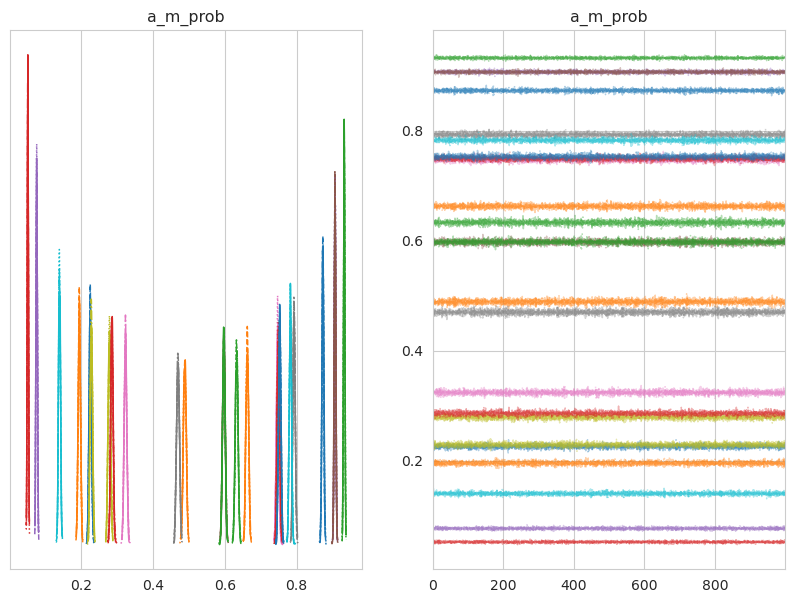

In [ ]:
az.plot_trace(posterior_dict, var_names=['a_m'], figsize=(10, 7))